In [ ]:
# Get helper_functions.py script from Github
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

--2025-04-06 15:58:21--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-04-06 15:58:21 (15.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



# 10 % of Food Data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2025-04-06 15:58:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.207, 74.125.139.207, 74.125.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  79.1MB/s    in 2.0s    

2025-04-06 15:58:39 (79.1 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Walk through 10 percent data directory and list numbers of files
walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/

In [ ]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
batch_size=16

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=batch_size)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# see and example batch of data
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[116.35715   143.64285   166.       ]
   [111.45408   135.54591   159.5      ]
   [111.78061   131.85713   156.13266  ]
   ...
   [114.36724   147.36725   166.36725  ]
   [107.14283   140.14284   159.14284  ]
   [102.05607   135.05606   154.05606  ]]

  [[113.28571   138.07143   160.14287  ]
   [110.07143   132.        154.85713  ]
   [109.984695  127.91327   149.31122  ]
   ...
   [115.55595   148.41309   167.48453  ]
   [103.790794  136.64793   155.71936  ]
   [101.668335  134.52548   153.59691  ]]

  [[111.57143   132.78572   154.2143   ]
   [109.928566  128.57143   148.7857   ]
   [109.78571   126.        142.16837  ]
   ...
   [111.42337   140.06622   160.85194  ]
   [104.499985  133.14284   153.92856  ]
   [103.29079   131.93364   152.71936  ]]

  ...

  [[118.07145   128.07144   129.07144  ]
   [120.72958   130.72958   131.72958  ]
   [121.66326   131.66327   132.66327  ]
   ...
   [127.99997   136.0715    143.18889  ]
   [128.58672   136.81636   148.21439  ]
   [1

# Transfer Learning

In [ ]:
# Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# Freeze the base model
base_model.trainable=False

# Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# Pass the inputs into the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalizer)
x = base_model(inputs)
# Check data shape after passing it to base model
print(f'Shape after base_model:{x.shape}')

# Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# Combine the inputs with the outputs into a node
model_0 = tf.keras.Model(inputs,outputs)

# Compile the model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 validation_steps=int(0.25 * len(test_data_10_percent)), # keep validation_steps for faster validation
                                 callbacks=[create_tensorboard_callback('transfer_learning','10_percent_feature_extract')])

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape after base_model:(None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20250406-155847
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.3376 - loss: 2.0059 - val_accuracy: 0.7862 - val_loss: 1.0804
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7974 - loss: 0.9864 - val_accuracy: 0.8355 - val_loss: 0.7396
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8488 - loss: 0.6987 - val_accuracy: 0.8520 - val_loss: 0.6180
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.8858 - loss: 0.5316 - val_accuracy: 0.8750 - val_loss: 0.5442
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8867 - loss: 0.4944 - val_accuracy: 0.8766 - val_loss: 0.5063


In [ ]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, '|', layer, '|', layer.name)

0 | <InputLayer name=input_layer, built=True> | input_layer
1 | <Rescaling name=rescaling, built=True> | rescaling
2 | <Normalization name=normalization, built=True> | normalization
3 | <Conv2D name=stem_conv, built=True> | stem_conv
4 | <BatchNormalization name=stem_bn, built=True> | stem_bn
5 | <Activation name=stem_activation, built=True> | stem_activation
6 | <Conv2D name=block1a_project_conv, built=True> | block1a_project_conv
7 | <BatchNormalization name=block1a_project_bn, built=True> | block1a_project_bn
8 | <Activation name=block1a_project_activation, built=True> | block1a_project_activation
9 | <Conv2D name=block2a_expand_conv, built=True> | block2a_expand_conv
10 | <BatchNormalization name=block2a_expand_bn, built=True> | block2a_expand_bn
11 | <Activation name=block2a_expand_activation, built=True> | block2a_expand_activation
12 | <Conv2D name=block2a_project_conv, built=True> | block2a_project_conv
13 | <BatchNormalization name=block2a_project_bn, built=True> | block2a_pro

In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, None, None, 3)  │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 32) │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 32) │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 32) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, None, None, 16) │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, None, None, 16) │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, None, None, 16) │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, None, None, 64) │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, None, None, 64) │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, None, None, 64) │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, None, None, 32) │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, None, None, 32) │            128 │ block2a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [ ]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

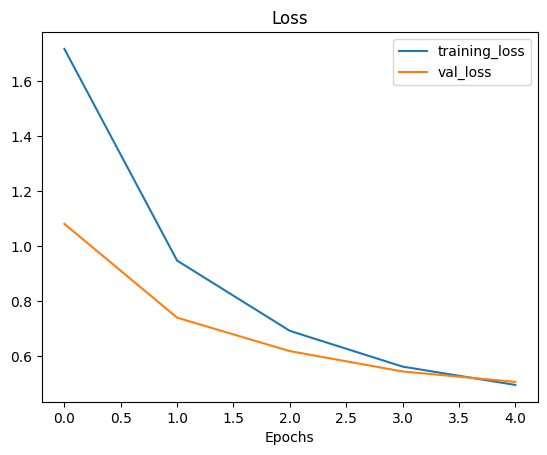

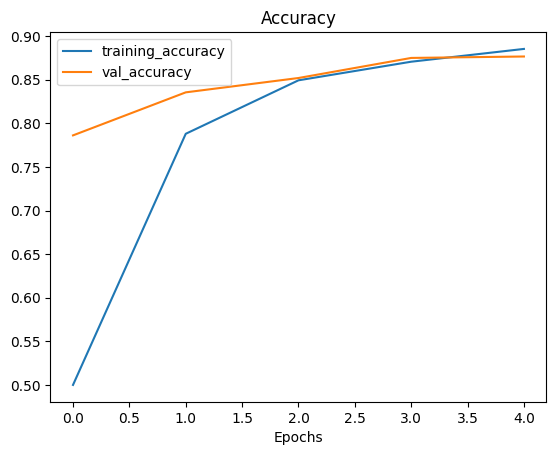

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
# Define input tensor shape (same number of dimensions as the output of efficientnetv2-b0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Random input tensor:\n {input_tensor} \n')

# Pass the random tensor through a global average pooling 2D layer
global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D gloabl average pooled random tensor:\n {global_average_pooling_layer} \n')

# Check the shapes of the different tensors
print(f'Shape of input tensor:\n {input_tensor.shape} \n')
print(f'Shape of 2D gloabl averaged pooled input tensor:\n {global_average_pooling_layer.shape} \n')

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]] 

2D gloabl average pooled random tensor:
 [[-0.09368646 -0.45840445 -0.28855976]] 

Shape of input tensor:
 (1, 4, 4, 3) 

Shape of 2D gloabl averaged pooled input tensor:
 (1, 3) 



In [ ]:
# This is the same as GloabalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1,2]) #average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

# Running a series of transfer learning experiments

In [ ]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2025-04-06 16:06:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.207, 142.250.98.207, 142.251.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   157MB/s    in 0.8s    

2025-04-06 16:06:50 (157 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
walk_through_dir('/content/10_food_classes_1_percent')

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_curry'

In [ ]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           batch_size=batch_size,
                                                                           image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_augmentation = keras.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name='data_augmentation')

(np.float64(-0.5), np.float64(467.5), np.float64(337.5), np.float64(-0.5))

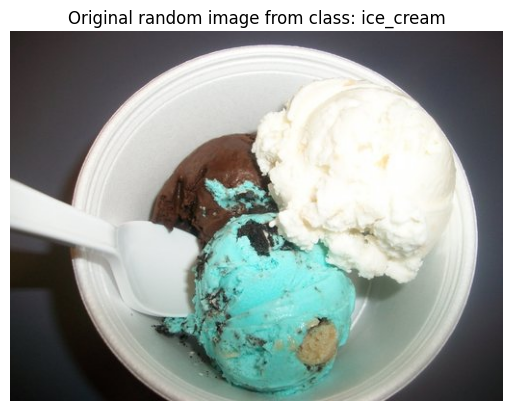

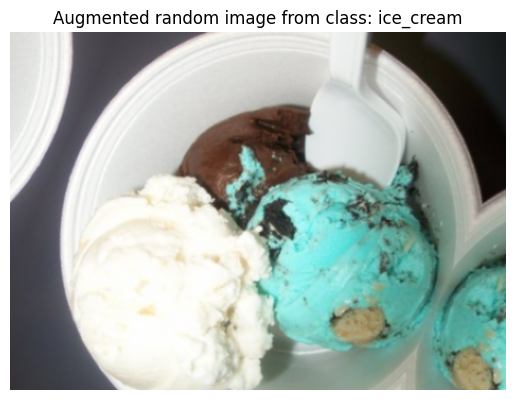

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = '/content/10_food_classes_1_percent/train/' + target_class # create target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + '/' + random_image # create the choosen random image path
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False)

# Augment the data
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, Height, Width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False)

In [ ]:
# Setup input shape and base model, freezing the base model layers
tf.keras.backend.clear_session()
input_shape = (224,224,3)
tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False).trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

# Add in dtaa augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False, input_shape=x.shape[1:])(x, training = False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
model_1_history = model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback('transfer_learning','1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20250406-160655
Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 105s 12s/step - accuracy: 0.1093 - loss: 2.3473 - val_accuracy: 0.3043 - val_loss: 2.0618
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 78s 11s/step - accuracy: 0.7828 - loss: 1.4863 - val_accuracy: 0.4556 - val_loss: 1.7649
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 82s 20s/step - accuracy: 0.9133 - loss: 0.9086 - val_accuracy: 0.4934 - val_loss: 1.4820
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 84s 20s/step - accuracy: 0.9154 - loss: 0.4538 - val_accuracy: 0.5066 - val_loss: 1.4175
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 11s/step - accuracy: 0.9952 - loss: 0.1425 - val_accuracy: 0.4836 - val_loss: 1.5801


In [ ]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.5020 - loss: 1.5345


[1.4945794343948364, 0.5127999782562256]

# Model 2: Feature extraxtion transfer learning with 10 percent of data and data augmentation

In [ ]:
from re import I
train_dir_10 = '/content/10_food_classes_10_percent/train/'
test_dir_10 = '/content/10_food_classes_10_percent/test'

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10,
                                                                            batch_size=batch_size,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical')

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
base_model_2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model_2.trainable=False

In [ ]:
# Setup input shape and base model, freezing the base model layers
tf.keras.backend.clear_session()
input_shape = (224,224,3)
tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False).trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

# Add in dtaa augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False, input_shape=x.shape[1:])(x, training = False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

# Make a model with inputs and outputs
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
model_1_history = model_1.fit(train_data_10_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data_10_percent,
                              validation_steps=int(0.25 * len(test_data_10_percent)),
                              callbacks=[create_tensorboard_callback('transfer_learning','1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20250406-161607
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.4975 - loss: 1.4699 - val_accuracy: 0.6579 - val_loss: 1.1786
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.6869 - loss: 1.0006 - val_accuracy: 0.6941 - val_loss: 1.0425
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.7518 - loss: 0.7595 - val_accuracy: 0.7336 - val_loss: 0.8511
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.7876 - loss: 0.6481 - val_accuracy: 0.6743 - val_loss: 1.1281
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.8696 - loss: 0.4387 - val_accuracy: 0.7204 - val_loss: 0.9361


In [ ]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int=10,
                      learning_rate: float=1e-3,
                      training: bool = False) -> tf.keras.Model:
    # Create base model
    tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False).trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = layers.Input(shape=input_shape, name='input_layer')
    x = data_augmentation(inputs)
    x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False, input_shape=x.shape[1:])(x, training=False) # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
    outputs = layers.Dense(units=output_shape, activation='softmax',name='output_layer')(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

# Create an instance of model_2 with out new function
model_2 = create_base_model()

# Creating a ModelChekpoint callback

In [ ]:
# Setup the checkpoint path
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt.weights.h5'

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True,  # save only the best model weights
                                                         save_freq='epoch',   # save every epoch
                                                         verbose=1)

In [ ]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5

history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation steps
                                          callbacks=[checkpoint_callback])

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3289 - loss: 1.9158
Epoch 1: val_loss improved from inf to 1.31856, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt.weights.h5
47/47 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.3318 - loss: 1.9088 - val_accuracy: 0.5938 - val_loss: 1.3186
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6253 - loss: 1.1477
Epoch 2: val_loss did not improve from 1.31856
47/47 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.6262 - loss: 1.1455 - val_accuracy: 0.5954 - val_loss: 1.3814
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7069 - loss: 0.9663
Epoch 3: val_loss improved from 1.31856 to 1.03460, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt.weights.h5
47/47 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.7073 - loss: 0.9642 - val_accuracy: 0.6645 - val_loss: 1.0346
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7921 - loss: 0.5887
Epoch 4: val_lo

In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)
loadded_weights_model_result = model_2.evaluate(test_data)

In [ ]:
# If the results from our native model and the loadded weights are the same, this should ouput True
results_10_percent_data_aug == loadded_weights_model_result

In [ ]:
import numpy as np
# Check to see if loadded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug),np.array(loadded_weights_model_result))

# Model 3: Fine-tuning an existing model on 10% of the data

In [ ]:
model_2.layers

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(f'Layer number: {layer_number} | Layer name: {layer.name} | Trainable? {layer.trainable}')

In [ ]:
model_2.summary()

In [ ]:
# Access the base model layers of model_2
model_2_base_model = model_2.layers[2]
model_2_base_model.name

In [ ]:
model_2_base_model.trainable = False

In [ ]:
# How many layers are trainable in our model_2_base_model
print(len(model_2_base_model.trainable_variables)) #layer at index 2 is the EfficientNetV2B0 layer

In [ ]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
# Make all the layers in model_2_base_model trainable
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustment to a model)
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
print(len(model_2.trainable_variables))

In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with mode trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1],
                                               validation_steps=int(0.25 * len(test_data)))

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [ ]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5);

# Model 4: Fine tuning an existing model on all of the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# How many images are we working with now?
walk_through_dir('/content/10_food_classes_all_data')

In [ ]:
# Setup data inputs
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode='categorical',
                                                                                 image_size=IMG_SIZE)
#Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

In [ ]:
# Create a new instance of model_2 for Experiment 4
model_4 = create_base_model(learning_rate=1e-4)

In [ ]:
model_4.layers[2].trainable = False

In [ ]:
# Load previously checpointed weights
model_4.load_weights(checkpoint_path)

In [ ]:
print(len(model_4.trainable_variables))

In [ ]:
# After loading the weights, this should have gone down (no fine-tune)
model_4.evaluate(test_data)

In [ ]:
# Check which layers are trainable in the whole model
for layer_number, layer in enumerate(model_4.layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
# Unfreeze the top 10 layers in model_2's base_model
model_4_base_model = model_4.layers[2]
model_4_base_model.trainable = True

for layer in model_4_base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
[(layer_number, layer.name, layer.trainable) for layer_number, layer in enumerate(model_4_base_model.layers)]

In [ ]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
fine_tune_epochs = initial_epochs + 5
model_4_history = model_2.fit(train_data_10_classes_full,
                              epochs=fine_tune_epochs,
                              validation_data=test_data,
                              initial_epoch=history_10_percent_data_aug.epoch[-1],
                              validation_steps=int(0.25 * len(test_data)))

In [ ]:
plot_loss_curves(model_4_history)

In [ ]:
# How did fine_tuning go with mode data?
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=model_4_history,
                 initial_epochs=5)

# Model to predict 101 Classes

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_all_data.zip
unzip_data('101_food_classes_all_data.zip')

In [ ]:
train_dir = '/content/101_food_classes_all_data/train/'
test_dir = '/content/101_food_classes_all_data/test/'

In [ ]:
walk_through_dir('/content/101_food_classes_all_data')

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
batch_size=16

train_data_101_classes = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=batch_size)
test_data_101_classes = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical')

In [ ]:
train_data_101_classes

In [ ]:
train_data_101_classes.class_names

In [ ]:
for images, labels in train_data_101_classes.take(1):
  print(images, labels)

In [ ]:
base_model_3 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

base_model_3.trainable=False

inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

x = base_model_3(inputs)
print(f'Shape after base_model:{x.shape}')

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

outputs = tf.keras.layers.Dense(101, activation='softmax', name='output_layer')(x)

model_0 = tf.keras.Model(inputs,outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_101_classes = model_0.fit(train_data_101_classes,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_101_classes),
                                 validation_data=test_data_101_classes,
                                 validation_steps=int(0.25 * len(test_data_101_classes)), # keep validation_steps for faster validation
                                 callbacks=[create_tensorboard_callback('transfer_learning','101_percent_feature_extract')])

In [ ]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model_3.layers):
  print(layer_number, '|', layer, '|', layer.name)

In [ ]:
base_model_3.summary()

In [ ]:
model_0.summary()

In [ ]:
plot_loss_curves(history_101_classes)

In [ ]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Random input tensor:\n {input_tensor} \n')

global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D gloabl average pooled random tensor:\n {global_average_pooling_layer} \n')

print(f'Shape of input tensor:\n {input_tensor.shape} \n')
print(f'Shape of 2D gloabl averaged pooled input tensor:\n {global_average_pooling_layer.shape} \n')

In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2])

In [ ]:
data_augmentation = keras.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name='data_augmentation')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = '/content/101_food_classes_all_data/train/' + target_class # create target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + '/' + random_image # create the choosen random image path
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False)

# Augment the data
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, Height, Width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False)

In [ ]:
tf.keras.backend.clear_session()
input_shape = (224,224,3)
tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False).trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')

x = data_augmentation(inputs)

x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False, input_shape=x.shape[1:])(x, training = False)

x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = layers.Dense(101, activation='softmax', name='output_layer')(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1_history = model_1.fit(train_data_101_classes,
                              epochs=5,
                              steps_per_epoch=len(train_data_101_classes),
                              validation_data=test_data_101_classes,
                              validation_steps=int(0.25 * len(test_data_101_classes)),
                              callbacks=[create_tensorboard_callback('transfer_learning','101_percent_data_aug')])

In [ ]:
results_101_percent_data_aug = model_1.evaluate(test_data_101_classes)
results_101_percent_data_aug

In [ ]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int=101,
                      learning_rate: float=1e-3,
                      training: bool = False) -> tf.keras.Model:
    tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False).trainable = training

    inputs = layers.Input(shape=input_shape, name='input_layer')
    x = data_augmentation(inputs)
    x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False, input_shape=x.shape[1:])(x, training=False) # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
    outputs = layers.Dense(units=output_shape, activation='softmax',name='output_layer')(x)
    model = tf.keras.Model(inputs, outputs)

    model_101.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model_101

model_101_2 = create_base_model()

In [ ]:
checkpoint_path = 'one_hundred_classes_model_checkpoints_weights/checkpoint.ckpt.weights.h5'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True,  # save only the best model weights
                                                         save_freq='epoch',   # save every epoch
                                                         verbose=1)

In [ ]:
initial_epochs = 5

history_101_classes_data_aug = model_101_2.fit(train_data_101_classes,
                                          epochs=initial_epochs,
                                          validation_data=test_data_101_classes,
                                          validation_steps=int(0.25 * len(test_data_101_classes)), # do less steps per validation steps
                                          callbacks=[checkpoint_callback])

In [ ]:
results_101_classes_data_aug = model_101_2.evaluate(test_data_101_classes)
results_101_classes_data_aug

In [ ]:
plot_loss_curves(history_101_classes_data_aug)

In [ ]:
model_101_1.load_weights(checkpoint_path)
loadded_weights_model_result = model_101_2.evaluate(test_data)

In [ ]:
results_101_classes_data_aug == loadded_weights_model_result

In [ ]:
np.isclose(np.array(results_101_classes_data_aug),np.array(loadded_weights_model_result))

In [ ]:
model_101_2.layers

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(f'Layer number: {layer_number} | Layer name: {layer.name} | Trainable? {layer.trainable}')

In [ ]:
model_2.summary()

In [ ]:
# Access the base model layers of model_2
model_2_base_model = model_2.layers[2]
model_2_base_model.name

In [ ]:
model_2_base_model.trainable = False

In [ ]:
# How many layers are trainable in our model_2_base_model
print(len(model_2_base_model.trainable_variables)) #layer at index 2 is the EfficientNetV2B0 layer

In [ ]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
# Make all the layers in model_2_base_model trainable
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

# Recompile the whole model (always recompile after any adjustment to a model)
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

In [ ]:
print(len(model_2.trainable_variables))

In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with mode trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1],
                                               validation_steps=int(0.25 * len(test_data)))

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [ ]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5);